In [5]:
#!pip install git+https://github.com/syngokhan/NLP_Preprocess.git

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import Preprocess_gokhanEr as pp
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout,Conv1D,MaxPool1D,GlobalMaxPooling1D

In [8]:
path = "https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv "

df = pd.read_csv(path)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
vc = df["class"].value_counts()
vc

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [12]:
count = min(vc.values)
index = list(vc.index)
index,count

([1, 2, 0], 1430)

In [13]:
df_bal = pd.DataFrame()

for i in index:
    temp = df[df["class"] == i].sample(count)
    df_bal = df_bal.append(temp, ignore_index = True)

df_bal["class"].value_counts()

2    1430
1    1430
0    1430
Name: class, dtype: int64

In [15]:
df = df_bal.copy()
df.shape

(4290, 7)

In [16]:
def get_clean(words):

    words = pp.cont_exp(words)
    words = pp.remove_emails(words)
    words = pp.remove_urls(words)
    words = pp.remove_html_tags(words)
    words = pp.remove_rt(words)
    words = pp.remove_accented_chars(words)
    words = pp.remove_special_chars(words)
    words = pp.remove_dups_char(words)

    return words

In [17]:
x = "iiii loooooovvvvveeeeeee youuuuu"
get_clean(x)

'i love you'

In [18]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,12243,6,0,6,0,1,It's fact that a male brain cannot always hear...
1,7302,3,0,3,0,1,@swag_arella and getting pedicures bitching bo...
2,10125,3,0,3,0,1,Hoes gone be hoes but thats none my business !!
3,4229,9,0,9,0,1,@Mijo_LGI you're such a bitch
4,3056,3,0,3,0,1,@DavetheBrave1 perfect smoking weather haha br...


In [19]:
df["tweet"] = df["tweet"].apply(lambda words : get_clean(words))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,12243,6,0,6,0,1,Its fact that a male brain cannot always hear ...
1,7302,3,0,3,0,1,swag_arella and getting pedicures bitching abo...
2,10125,3,0,3,0,1,Hoes gone be hoes but thats none my business
3,4229,9,0,9,0,1,Mijo_LGI youre such a bitch
4,3056,3,0,3,0,1,DavetheBrave1 perfect smoking weather haha bro...


# Text Tokenization

In [20]:
text = df["tweet"].tolist()
text[:2]

['Its fact that a male brain cannot always hear the high pitched voice of a women So bitch do not get madI really did not hear you',
 'swag_arella and getting pedicures bitching about their ex and going tanning is something a bitch does']

In [21]:
token = Tokenizer()
token.fit_on_texts(text)

In [22]:
len(token.word_counts)

11703

In [23]:
print(token.index_word)

{1: 'a', 2: 'the', 3: 'rt', 4: 'you', 5: 'i', 6: 'to', 7: 'is', 8: 'bitch', 9: 'and', 10: 'not', 11: 'that', 12: 'my', 13: 'in', 14: 'of', 15: 'be', 16: 'like', 17: 'me', 18: 'on', 19: 'it', 20: 'for', 21: 'trash', 22: 'this', 23: 'do', 24: 'your', 25: 'are', 26: 'with', 27: 'im', 28: 'out', 29: 'ass', 30: 'bitches', 31: 'all', 32: 'so', 33: 'just', 34: 'they', 35: 'but', 36: 'hoes', 37: 'up', 38: 'nigga', 39: 'if', 40: 'fuck', 41: 'he', 42: 'have', 43: 'no', 44: 'faggot', 45: 'pussy', 46: 'at', 47: 'get', 48: 'hoe', 49: 'was', 50: 'when', 51: 'about', 52: 'what', 53: 'these', 54: 'got', 55: 'shit', 56: 'white', 57: 'can', 58: 'she', 59: 'we', 60: 'laughing', 61: 'loud', 62: 'fucking', 63: 'am', 64: 'who', 65: 'some', 66: 'youre', 67: 'or', 68: 'her', 69: 'niggas', 70: 'know', 71: 'one', 72: 'off', 73: 'how', 74: 'as', 75: 'people', 76: 'nigger', 77: 'his', 78: 'bird', 79: 'them', 80: 'go', 81: 'from', 82: 'its', 83: 'hate', 84: 'yall', 85: 'man', 86: 'yankees', 87: 'an', 88: 'then', 8

In [24]:
x = ["i love you"]

token.texts_to_sequences(x)

[[5, 89, 4]]

In [26]:
# Keras Dökümanda Yazıyor !!!!

vocab_size = len(token.word_counts) + 1
vocab_size

11704

In [ ]:
encoded_text = token.texts_to_sequences(text)
encoded_text

In [29]:
liste = []

for i in text:
    liste.append(len(i.split()))

np.array(liste).max()

54

In [30]:
max_length = 120

In [31]:
X = pad_sequences(encoded_text, maxlen = max_length, padding = "post")
X.shape

(4290, 120)

In [32]:
X[0]

array([  82,  601,   11,    1, 2335,  830,  119,  161,  398,    2,  294,
       3818,  831,   14,    1,  264,   32,    8,   23,   10,   47, 3819,
        113,  120,   10,  398,    4,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

# Model Building

In [33]:
y = pd.get_dummies(df["class"]).values
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [34]:
y = y.astype(float)
y.shape

(4290, 3)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2, stratify = y)

X_train.shape, X_test.shape

((3432, 120), (858, 120))

In [41]:
vec_size = 300
vocab_size,max_length,vec_size

(11704, 120, 300)

In [49]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = vec_size, input_length=max_length))

model.add(Conv1D(filters = 32, kernel_size = 2, activation ="relu"))
model.add(MaxPool1D(pool_size = 2))
model.add(Dropout(rate = 0.2))

model.add(Dense(units =  32, activation = "relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation="softmax"))

model.compile(optimizer = Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test), shuffle = True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
108/108 [==============================] - 8s 67ms/step - loss: 0.9548 - accuracy: 0.5830 - val_loss: 0.7246 - val_accuracy: 0.7308
Epoch 2/5
108/108 [==============================] - 7s 66ms/step - loss: 0.5250 - accuracy: 0.8042 - val_loss: 0.5562 - val_accuracy: 0.7914
Epoch 3/5
108/108 [==============================] - 7s 66ms/step - loss: 0.3242 - accuracy: 0.8843 - val_loss: 0.5643 - val_accuracy: 0.7751
Epoch 4/5
108/108 [==============================] - 7s 66ms/step - loss: 0.1810 - accuracy: 0.9356 - val_loss: 0.6258 - val_accuracy: 0.7716
Epoch 5/5
108/108 [==============================] - 7s 65ms/step - loss: 0.0953 - accuracy: 0.9735 - val_loss: 0.7061 - val_accuracy: 0.7646


In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 300)          3511200   
                                                                 
 conv1d_5 (Conv1D)           (None, 119, 32)           19232     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 59, 32)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 59, 32)            0         
                                                                 
 dense_8 (Dense)             (None, 59, 32)            1056      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 32)               0         
 balMaxPooling1D)                                     

# Model Testing

In [78]:
def history_graph(history):

    size = 15
    length = len(history.history["accuracy"])

    plt.figure(figsize = (15,7))

    plt.subplot(1,2,1)
    
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")


    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))
    
    plt.subplot(1,2,2)

    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")

    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))

    plt.suptitle("History Graph", size = size )
    plt.show()

In [79]:
def confusion_graph(y_true,y_pred):

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,7))
    sns.heatmap(cm , annot = True , cmap = "viridis",cbar = False, annot_kws={"size" : 15}, fmt = "d", linecolor="white",linewidths=0.5)
    
    size = 15
    plt.xlabel("Predicted",size = size)
    plt.ylabel("Actual", size = size)
    plt.title("Confusion Graph" , size = size)
    plt.show()
    

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:4]

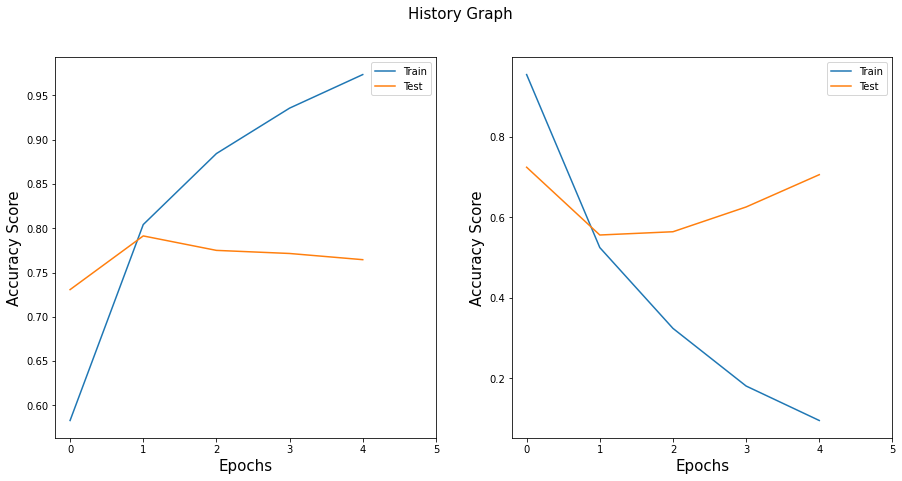

In [80]:
history_graph(history)

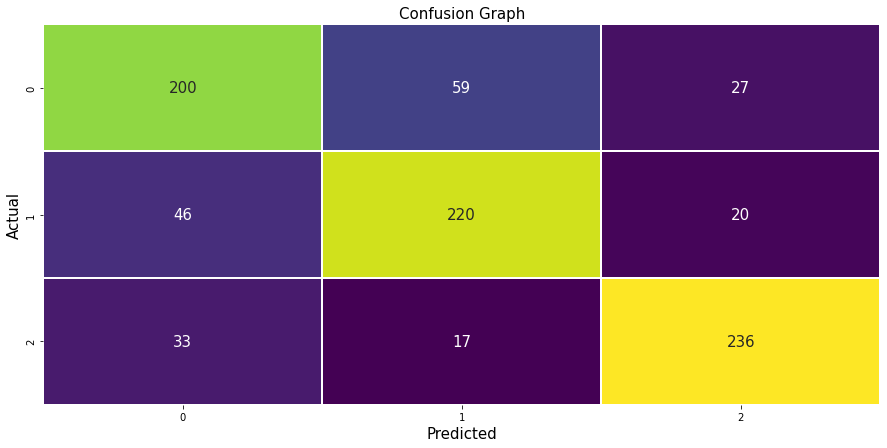

In [85]:
confusion_graph(np.argmax(y_test, axis = 1), y_pred)

# Testing With Custom Data

In [86]:
X = "hey bitch hass up"

In [88]:
token.texts_to_sequences([X])

[[329, 8, 37]]

In [89]:
def get_encoded(words):

    words = get_clean(words)
    # Liste olmalı
    words = token.texts_to_sequences([words])
    words = pad_sequences(words, maxlen = max_length, padding = "post")

    return words

In [91]:
get_encoded(X)

array([[329,   8,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [92]:
np.argmax(model.predict(get_encoded(X)))

1

# Save Models 

In [97]:
import pickle

pickle.dump(token,open("token.pkl",mode ="wb"))

In [96]:
from tensorflow.keras.models import load_model

model.save("Model",save_format = "h5")

last_model = load_model("Model")
last_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 300)          3511200   
                                                                 
 conv1d_5 (Conv1D)           (None, 119, 32)           19232     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 59, 32)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 59, 32)            0         
                                                                 
 dense_8 (Dense)             (None, 59, 32)            1056      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 32)               0         
 balMaxPooling1D)                                     